In [5]:
from helpers import *
from interactions import *

import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [55]:
init_notebook_mode(connected=True)

In [6]:
ridgeReg = Ridge(alpha=.075, normalize=True)

ridgeReg.fit(features_,y_train)

ridge_y_pred = ridgeReg.predict(features_interactions_test)

[Text(0,0.5,'Actual Literacy Rate'),
 Text(0.5,0,'Values Predicted By Model'),
 Text(0.5,1,'Residual Errors Plot')]

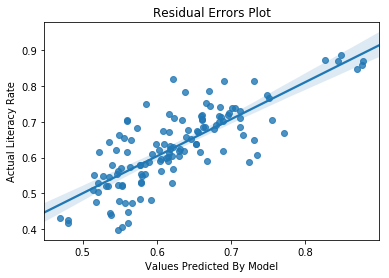

In [70]:
ridge_residuals = sns.regplot(ridge_y_pred, y_test)
ridge_residuals.set(xlabel='Values Predicted By Model', ylabel= 'Actual Literacy Rate', title='Residual Errors Plot')

In [63]:
#model score (R^2 and Adjusted R2)

rar2 = 1 - (1-ridgeReg.score(features_interactions_test, y_test))*(len(y_test)-1)/(len(y_test)-features_interactions_test.shape[1]-1)

In [64]:
print('R2', ridgeReg.score(features_interactions_train, y_train))
print('Adjusted R2:', rar2)
print('MSE:', mean_squared_error(y_test, ridge_y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, ridge_y_pred)))
print('Normalized RMSE:', np.sqrt(mean_squared_error(y_test, ridge_y_pred))/ y_test.std())

R2 0.48896269666875436
Adjusted R2: 0.47730076375149555
MSE: 0.004389889618438487
RMSE: 0.06625624210924196
Normalized RMSE: 0.6095953479730806


In [27]:
ridge_coef = pd.DataFrame(ridgeReg.coef_).T
ridge_coef.columns = list(features_interactions_train.columns)
ridge_coef = ridge_coef.T.sort_values(by=0).T
x = list(ridge_coef.columns)

In [65]:
ridge_data = [go.Bar(
            x=x,
            y=ridge_coef.iloc[0],
            marker = {'color': [random_color(coef) for coef in ridge_coef.iloc[0]]},
            
            
    )]
ridge_layout = go.Layout(
    title='Feature Coefficients',
)
ridge_fig = go.Figure(data=ridge_data, layout=ridge_layout)
iplot(ridge_fig)